## libraries

In [8]:
# !pip install textblob

In [9]:
import requests
from bs4 import BeautifulSoup
import re
from textblob import TextBlob

In [10]:
class WebScraper:
    def __init__(self, url):
        self.__url = url

    @property
    def url(self):
        return self.__url
    
    @url.setter
    def url(self, url):
        self.__url = url
    
    def download_html(self, file_name='webpage.html'):
        try:
            print(f"Downloading page content from: {self.url}")
            response = requests.get(self.url)
            with open(file_name, 'w') as file:
                print(f"Saving page content to: {file_name}")
                file.write(response.text)
            print("Download completed successfully")
        except Exception as e:
            print("Unable to download page content")
            print(e)

    def scrape_multiple_pages(self, urls, item_name='article'):
        for i, url in enumerate(urls):
            file_name = f"{item_name}{i+1}.html"
            self.url = url
            self.download_html(file_name)


    def extract_content(self, file_name='webpage.html'):

        paragraphs = []
        title = None

        try:
            print(f"Extracting content from: {file_name}")
            with open(file_name, 'r') as page:
                page_soup = BeautifulSoup(page, 'html.parser')
                
                print(f"Page parsed successfully")
                
                title = page_soup.title.string.strip()
                print(f"Page title extracted: {title}")
                
                paragraphs = page_soup.find_all('p')

                #clean up paragraphs removing spaces and new lines
                paragraphs = [p.text.strip() for p in paragraphs if p.text.strip() != '']

                print(f"Paragraphs extracted, total paragraphs: {len(paragraphs)}")
                
        except Exception as e:
            print("Unable to extract content")
            print(e)
        
        return title, paragraphs
    

    def save_text(self, file_name='extracted_content.txt'):
        
        try:
            title, paragraphs = self.extract_content()
            print(f"Saving extracted content to: {file_name}")

            with open(file_name, 'w') as file:
                
                file.write(f"{title}\n\n")

                for paragraph in paragraphs:
                    file.write(f"{paragraph}\n\n")
            
            print("Content saved successfully")
        except Exception as e:
            
            print("Unable to save extracted content")
            print(e)

class TextProcessor:
    
    @staticmethod
    def clean_text(paragraphs):
        cleaned_paragraphs = []
        
        for paragraph in paragraphs:
            #remove html tags
            paragraph = BeautifulSoup(paragraph, 'html.parser').get_text()
            
            #remove special characters using regex
            paragraph = re.sub(r'[^a-zA-Z0-9\s]', '', paragraph)

            # remove extra spaces
            paragraph = re.sub(r'\s+', ' ', paragraph)
           
            #convert to lowercase
            paragraph = paragraph.lower()
            
            cleaned_paragraphs.append(paragraph)
        
        return cleaned_paragraphs
    


class SentimentAnalyzer:
        
        @staticmethod
        def analyze_sentiment(file_name='extracted_content.txt'):
            
            try:
                with open(file_name, 'r') as file:
                    paragraphs = file.readlines()
                    
                    for i, paragraph in enumerate(paragraphs):
                        blob = TextBlob(paragraph)
                        print(f"Paragraph {i+1}:")
                        print(paragraph)
                        print(f"Sentiment Polarity: {blob.sentiment.polarity}")
                        print(f"Sentiment Subjectivity: {blob.sentiment.subjectivity}")
                        print()
            except Exception as e:
                print("Unable to analyze sentiment")
                print(e)


        @staticmethod
        def count_sentiments(file_name='extracted_content.txt'):
            counts = {
                'positive': 0,
                'negative': 0,
                'neutral': 0
            }

            try:
                with open(file_name, 'r') as file:
                    paragraphs = file.readlines()
                    
                    for i, paragraph in enumerate(paragraphs):
                        blob = TextBlob(paragraph)
                        if blob.sentiment.polarity > 0:
                            counts['positive'] += 1
                        elif blob.sentiment.polarity < 0:
                            counts['negative'] += 1
                        else:
                            counts['neutral'] += 1
                    
                    print("Sentiment Counts:")
                    print(f"Positive: {counts['positive']}")
                    print(f"Negative: {counts['negative']}")
                    print(f"Neutral: {counts['neutral']}")
                    
            except Exception as e:
                print("Unable to count sentiments")
                print(e)

            return counts

        @staticmethod
        def summarize_sentiment(paragraphs,file_name = "summary.txt"):
            with open(file_name, 'w') as file:
                file.write(f"Total number of paragraphs analyzed: {len(paragraphs)}\n\n")
                counts = SentimentAnalyzer.count_sentiments()

                # polarity counts
                file.write(f"Positive: {counts['positive']}\n\n")
                file.write(f"Negative: {counts['negative']}\n\n")
                file.write(f"Neutral: {counts['neutral']}\n\n")

                # average
                #  sum / total 
                sum_polarity = 0
                sum_subjectivity = 0
                for paragraph in paragraphs:
                    blob = TextBlob(paragraph)
                    sum_polarity += blob.sentiment.polarity
                    sum_subjectivity += blob.sentiment.subjectivity

                # avg 
                avg_polarity = sum_polarity/len(paragraphs)
                avg_subjectivity = sum_subjectivity/len(paragraphs)
                file.write(f"The average polarity: {avg_polarity:.3f}\n\n")
                file.write(f"The average subjectivity: {avg_subjectivity:.3f}")

    
class Visualizer:
    def plot_sentiment(counts):
        import seaborn as sns
        import matplotlib.pyplot as plt

        labels = counts.keys()
        values = counts.values()
        
        sns.barplot(x=list(labels), y=list(values))
        plt.title('Sentiment Analysis')
        plt.xlabel('Sentiment')
        plt.ylabel('Count')
        plt.show()
    
        



## Testing block

Saving page content to: webpage.html
Download completed successfully
Extracting content from: webpage.html
Page parsed successfully
Page title extracted: CMU-Africa
Paragraphs extracted, total paragraphs: 57
Extracting content from: webpage.html
Page parsed successfully
Page title extracted: CMU-Africa
Paragraphs extracted, total paragraphs: 57
Saving extracted content to: extracted_content.txt
Content saved successfully
Sentiment Counts:
Positive: 11
Negative: 3
Neutral: 102
Sentiment Counts:
Positive: 11
Negative: 3
Neutral: 102


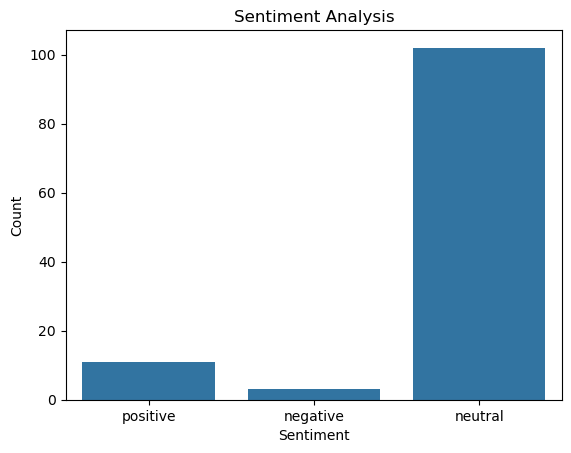

Saving page content to: page1.html
Download completed successfully
Saving page content to: page2.html
Download completed successfully
Saving page content to: page3.html
Download completed successfully
Saving page content to: page4.html
Download completed successfully
Saving page content to: page5.html
Download completed successfully
Saving page content to: page6.html
Download completed successfully


In [11]:
webpage_url = 'https://www.africa.engineering.cmu.edu/'

urls = [
    'https://www.africa.engineering.cmu.edu/',
    'https://www.africa.engineering.cmu.edu/about',
    'https://www.africa.engineering.cmu.edu/programs',
    'https://www.africa.engineering.cmu.edu/research',
    'https://www.africa.engineering.cmu.edu/news',
    'https://www.africa.engineering.cmu.edu/events',
]

web_scrapper = WebScraper(webpage_url)
web_scrapper.download_html()

title, paragraphs = web_scrapper.extract_content()

web_scrapper.save_text()

paragraphs = TextProcessor.clean_text(paragraphs)

# SentimentAnalyzer.analyze_sentiment()

counts = SentimentAnalyzer.count_sentiments()

SentimentAnalyzer.summarize_sentiment(paragraphs)

Visualizer.plot_sentiment(counts)

web_scrapper.scrape_multiple_pages(urls, item_name='page')